<a href="https://colab.research.google.com/github/akiabe/coding-practice/blob/master/real_or_not_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/real_or_not/train.csv")
print(df.head())
print(f"shape : {df.shape}")

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]
shape : (7613, 5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


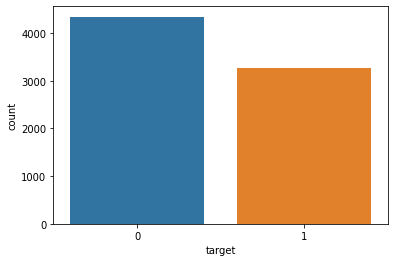

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="target", data=df)
plt.show()

In [ ]:
from sklearn import model_selection

df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.target.values
kf = model_selection.StratifiedKFold(n_splits=3)
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
  df.loc[v_, 'kfold'] = f
df.to_csv(
    "/content/drive/My Drive/Project/real_or_not/train_folds.csv",
    index=False
    )

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics

def run(fold):
  df = pd.read_csv("/content/drive/My Drive/Project/real_or_not/train_folds.csv")
  train_df = df[df.kfold != fold].reset_index(drop=True)
  valid_df = df[df.kfold == fold].reset_index(drop=True)
  
  print("fitting tokenizer...")

  VOCAB_SIZE = 10000
  EMBEDDING_DIM = 16
  MAX_LEN = 128
  TRUNCATING = "post"
  OOV_TOKEN = "<OOV>"

  tokenizer = tf.keras.preprocessing.text.Tokenizer(
      num_words=VOCAB_SIZE,
      oov_token=OOV_TOKEN
  )

  tokenizer.fit_on_texts(df.text.values.tolist())
  
  xtrain = tokenizer.texts_to_sequences(train_df.text.values)
  xvalid = tokenizer.texts_to_sequences(valid_df.text.values)

  xtrain = tf.keras.preprocessing.sequence.pad_sequences(
      xtrain,
      maxlen=MAX_LEN,
      truncating=TRUNCATING
  )
  xvalid = tf.keras.preprocessing.sequence.pad_sequences(
      xvalid,
      maxlen=MAX_LEN
  )
  
  ytrain = train_df.target.values
  yvalid = valid_df.target.values

  print("loading model...")

  model = tf.keras.Sequential([
                               tf.keras.layers.Embedding(
                                   VOCAB_SIZE,
                                   EMBEDDING_DIM,
                                   input_length=MAX_LEN
                                   ),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(6, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  print("training model...")
  
  EPOCHS = 10

  model.fit(
      xtrain,
      ytrain,
      validation_data=(xvalid, yvalid),
      verbose=1,
      epochs=EPOCHS
  )

  valid_preds = model.predict(xvalid)
  valid_preds = np.array(valid_preds) >= 0.5
  accuracy = metrics.accuracy_score(yvalid, valid_preds)
  print(f"Accuracy Score = {accuracy}")

if __name__ == "__main__":
  run(fold=0)
  run(fold=1)
  run(fold=2)


fitting tokenizer...
loading model...
training model
Epoch 1/10
159/159 [==============================] - 1s 5ms/step - loss: 0.6689 - accuracy: 0.5685 - val_loss: 0.6435 - val_accuracy: 0.5705
Epoch 2/10
159/159 [==============================] - 1s 4ms/step - loss: 0.5979 - accuracy: 0.6934 - val_loss: 0.5883 - val_accuracy: 0.7080
Epoch 3/10
159/159 [==============================] - 1s 4ms/step - loss: 0.5114 - accuracy: 0.8071 - val_loss: 0.5496 - val_accuracy: 0.7786
Epoch 4/10
159/159 [==============================] - 1s 4ms/step - loss: 0.4293 - accuracy: 0.8705 - val_loss: 0.5342 - val_accuracy: 0.7841
Epoch 5/10
159/159 [==============================] - 1s 4ms/step - loss: 0.3573 - accuracy: 0.9048 - val_loss: 0.5352 - val_accuracy: 0.7778
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.2360 - accuracy: 0.9434 - val_loss: 0.5321 - val_accuracy: 0.7734
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 0.1193 - accuracy: 0.

In [ ]:
import random
import numpy as np

a = [1, 2, 3, 4]
len_a = len(a)

batch_size = 10
b = [0] * batch_size
len_b = len(b)
lines_idx = [*range(len_a)]
print(f"lines idx : {lines_idx}")
print()

idx = 0
batch_counter = 1
random.shuffle(lines_idx)

for i in range(len_b):
  if idx >= len_a:
    idx = 0
    batch_counter += 1
    random.shuffle(lines_idx)
    print("idx >= len_a")
    print(f"batch : {batch_counter}, b : {b}")
    print()
    
  b[i] = a[lines_idx[idx]]
  idx += 1
  print("idx < len_a")
  print(f"batch : {batch_counter}, b : {b}")
  print()

lines idx : [0, 1, 2, 3]

idx < len_a
batch : 1, b : [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]

idx < len_a
batch : 1, b : [3, 1, 0, 0, 0, 0, 0, 0, 0, 0]

idx < len_a
batch : 1, b : [3, 1, 4, 0, 0, 0, 0, 0, 0, 0]

idx < len_a
batch : 1, b : [3, 1, 4, 2, 0, 0, 0, 0, 0, 0]

idx >= len_a
batch : 2, b : [3, 1, 4, 2, 0, 0, 0, 0, 0, 0]

idx < len_a
batch : 2, b : [3, 1, 4, 2, 2, 0, 0, 0, 0, 0]

idx < len_a
batch : 2, b : [3, 1, 4, 2, 2, 4, 0, 0, 0, 0]

idx < len_a
batch : 2, b : [3, 1, 4, 2, 2, 4, 1, 0, 0, 0]

idx < len_a
batch : 2, b : [3, 1, 4, 2, 2, 4, 1, 3, 0, 0]

idx >= len_a
batch : 3, b : [3, 1, 4, 2, 2, 4, 1, 3, 0, 0]

idx < len_a
batch : 3, b : [3, 1, 4, 2, 2, 4, 1, 3, 1, 0]

idx < len_a
batch : 3, b : [3, 1, 4, 2, 2, 4, 1, 3, 1, 3]



In [ ]:
!pip install -q -U trax
import trax

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project/real_or_not/train.csv")
print(df.head())
print(f"shape : {df.shape}")
print(f"dtype : {type(df)}")

   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]
shape : (7613, 5)
dtype : <class 'pandas.core.frame.DataFrame'>


In [ ]:
def load_tweets():
    all_positive_tweets = twitter_samples.strings('positive_tweets.json')
    all_negative_tweets = twitter_samples.strings('negative_tweets.json')  
    return all_positive_tweets, all_negative_tweets

import numpy as np

# Load positive and negative tweets
all_positive_tweets, all_negative_tweets = load_tweets()

# View the total number of positive and negative tweets.
print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")

# Split positive set into validation and training
val_pos   = all_positive_tweets[3000:] # generating validation set for positive tweets
train_pos  = all_positive_tweets[:3000]# generating training set for positive tweets

# Split negative set into validation and training
val_neg   = all_negative_tweets[3000:] # generating validation set for negative tweets
train_neg  = all_negative_tweets[:3000] # generating training set for nagative tweets

# Combine training data into one set
train_x = train_pos + train_neg 

# Combine validation data into one set
val_x  = val_pos + val_neg

# Set the labels for the training set (1 for positive, 0 for negative)
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))

# Set the labels for the validation set (1 for positive, 0 for negative)
val_y  = np.append(np.ones(len(val_pos)), np.zeros(len(val_neg)))

print(f"length of train_x {len(train_x)}")
print(f"length of val_x {len(val_x)}")

The number of positive tweets: 5000
The number of negative tweets: 5000
length of train_x 6000
length of val_x 4000


In [ ]:
import string
import re
import os
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples 

tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Stop words are messy and not that compelling; 
# "very" and "not" are considered stop words, but they are obviously expressing sentiment

# The porter stemmer lemmatizes "was" to "wa".  Seriously???

# I'm not sure we want to get into stop words
stopwords_english = stopwords.words('english')

# Also have my doubts about stemming...
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def process_tweet(tweet):
    '''
    Input: 
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    
    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    ### START CODE HERE ###
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
            word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    ### END CODE HERE ###
    return tweets_clean

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


# Include special tokens 
# started with pad, end of line and unk tokens
Vocab = {'__PAD__': 0, '__</e>__': 1, '__UNK__': 2} 

# Note that we build vocab using training data
for tweet in train_x: 
    processed_tweet = process_tweet(tweet)
    for word in processed_tweet:
        if word not in Vocab: 
            Vocab[word] = len(Vocab)
    
print("Total words in vocab are",len(Vocab))
#display(Vocab)

Total words in vocab are 7520


In [ ]:
def tweet_to_tensor(tweet, vocab_dict, unk_token='__UNK__', verbose=False):
    '''
    Input: 
        tweet - A string containing a tweet
        vocab_dict - The words dictionary
        unk_token - The special string for unknown tokens
        verbose - Print info durign runtime
    Output:
        tensor_l - A python list with
        
    '''  
    
    ### START CODE HERE (Replace instances of 'None' with your code) ###
    # Process the tweet into a list of words
    # where only important words are kept (stop words removed)
    word_l = process_tweet(tweet)
    
    if verbose:
        print("List of words from the processed tweet:")
        print(word_l)
        
    # Initialize the list that will contain the unique integer IDs of each word
    tensor_l = []
    
    # Get the unique integer ID of the __UNK__ token
    unk_ID = vocab_dict[unk_token]
    
    if verbose:
        print(f"The unique integer ID for the unk_token is {unk_ID}")
        
    # for each word in the list:
    for word in word_l:
        
        # Get the unique integer ID.
        # If the word doesn't exist in the vocab dictionary,
        # use the unique ID for __UNK__ instead.
        
        word_ID = vocab_dict[word] if word in vocab_dict.keys() else unk_ID
    
    ### END CODE HERE ###
        
        # Append the unique integer ID to the tensor list.
        tensor_l.append(word_ID) 
    
    return tensor_l

In [ ]:
import random as rnd

# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED: Data generator
def data_generator(data_pos, data_neg, batch_size, loop, vocab_dict, shuffle=False):
    '''
    Input: 
        data_pos - Set of posstive examples
        data_neg - Set of negative examples
        batch_size - number of samples per batch. Must be even
        loop - True or False
        vocab_dict - The words dictionary
        shuffle - Shuffle the data order
    Yield:
        inputs - Subset of positive and negative examples
        targets - The corresponding labels for the subset
        example_weights - An array specifying the importance of each example
        
    '''     
### START GIVEN CODE ###
    # make sure the batch size is an even number
    # to allow an equal number of positive and negative samples
    assert batch_size % 2 == 0
    
    # Number of positive examples in each batch is half of the batch size
    # same with number of negative examples in each batch
    n_to_take = batch_size // 2
    
    # Use pos_index to walk through the data_pos array
    # same with neg_index and data_neg
    pos_index = 0
    neg_index = 0
    
    len_data_pos = len(data_pos)
    len_data_neg = len(data_neg)
    
    # Get and array with the data indexes
    pos_index_lines = list(range(len_data_pos))
    neg_index_lines = list(range(len_data_neg))
    
    # shuffle lines if shuffle is set to True
    if shuffle:
        rnd.shuffle(pos_index_lines)
        rnd.shuffle(neg_index_lines)
        
    stop = False
    
    # Loop indefinitely
    while not stop:  
        
        # create a batch with positive and negative examples
        batch = []
        
        # First part: Pack n_to_take positive examples
        
        # Start from pos_index and increment i up to n_to_take
        for i in range(n_to_take):
                    
            # If the positive index goes past the positive dataset lenght,
            if pos_index >= len_data_pos: 
                
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True;
                    break;
                
                # If user wants to keep re-using the data, reset the index
                pos_index = 0
                
                if shuffle:
                    # Shuffle the index of the positive sample
                    rnd.shuffle(pos_index_lines)
                    
            # get the tweet as pos_index
            tweet = data_pos[pos_index_lines[pos_index]]
            
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            
            # append the tensor to the batch list
            batch.append(tensor)
            
            # Increment pos_index by one
            pos_index = pos_index + 1

### END GIVEN CODE ###
            
### START CODE HERE (Replace instances of 'None' with your code) ###

        # Second part: Pack n_to_take negative examples
    
        # Using the same batch list, start from neg_index and increment i up to n_to_take
        for i in range(n_to_take):
            
            # If the negative index goes past the negative dataset length,
            if neg_index >= len_data_neg:
                
                # If loop is set to False, break once we reach the end of the dataset
                if not loop:
                    stop = True;
                    break;
                    
                # If user wants to keep re-using the data, reset the index
                neg_index = 0
                
                if shuffle:
                    # Shuffle the index of the negative sample
                    rnd.shuffle(neg_index_lines)
            # get the tweet as neg_index
            tweet = data_neg[neg_index_lines[neg_index]]
            
            # convert the tweet into tensors of integers representing the processed words
            tensor = tweet_to_tensor(tweet, vocab_dict)
            
            # append the tensor to the batch list
            batch.append(tensor)
            
            # Increment neg_index by one
            neg_index = neg_index + 1

### END CODE HERE ###        

### START GIVEN CODE ###
        if stop:
            break;

        # Update the start index for positive data 
        # so that it's n_to_take positions after the current pos_index
        pos_index += n_to_take
        
        # Update the start index for negative data 
        # so that it's n_to_take positions after the current neg_index
        neg_index += n_to_take
        
        # Get the max tweet length (the length of the longest tweet) 
        # (you will pad all shorter tweets to have this length)
        max_len = max([len(t) for t in batch]) 
        
        
        # Initialize the input_l, which will 
        # store the padded versions of the tensors
        tensor_pad_l = []
        
        # Pad shorter tweets with zeros
        for tensor in batch:
            
### END GIVEN CODE ###

### START CODE HERE (Replace instances of 'None' with your code) ###
            # Get the number of positions to pad for this tensor so that it will be max_len long
            n_pad = max_len - len(tensor)
            
            # Generate a list of zeros, with length n_pad
            pad_l = [0] * n_pad
            
            # concatenate the tensor and the list of padded zeros
            tensor_pad = tensor + pad_l
            
            # append the padded tensor to the list of padded tensors
            tensor_pad_l.append(tensor_pad)

        # convert the list of padded tensors to a numpy array
        # and store this as the model inputs
        inputs = np.array(tensor_pad_l)
  
        # Generate the list of targets for the positive examples (a list of ones)
        # The length is the number of positive examples in the batch
        target_pos = [1] * n_to_take
        
        # Generate the list of targets for the negative examples (a list of zeros)
        # The length is the number of negative examples in the batch
        target_neg = [0] * n_to_take
        
        # Concatenate the positve and negative targets
        target_l = target_pos + target_neg
        
        # Convert the target list into a numpy array
        targets = np.array(target_l)

        # Example weights: Treat all examples equally importantly.It should return an np.array. Hint: Use np.ones_like()
        example_weights = np.ones_like(targets)
        

### END CODE HERE ###

### GIVEN CODE ###
        # note we use yield and not return
        yield inputs, targets, example_weights

In [ ]:
def train_generator(batch_size, shuffle = False):
    return data_generator(train_pos, train_neg, batch_size, True, Vocab, shuffle)

def val_generator(batch_size, shuffle = False):
    return data_generator(val_pos, val_neg, batch_size, True, Vocab, shuffle)

# Get a batch from the train_generator and inspect.
inputs, targets, example_weights = next(train_generator(4, shuffle=True))

# this will print a list of 4 tensors padded with zeros
print(f'Inputs: {inputs}')
print(f'Targets: {targets}')
print(f'Example Weights: {example_weights}')


Inputs: [[1506 1507  109   95   14 2551 2552    9]
 [ 991 1523   44    9  309  700   62    0]
 [3761   22  136 2057   50  136    0    0]
 [ 239   73 4023 6743 3761    0    0    0]]
Targets: [1 1 0 0]
Example Weights: [1 1 1 1]


In [ ]:
import trax

# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: classifier
def classifier(vocab_size=len(Vocab), embedding_dim=256, output_dim=2, mode='train'):
        
### START CODE HERE (Replace instances of 'None' with your code) ###
    # create embedding layer
    embed_layer = tl.Embedding(
        vocab_size=vocab_size, # Size of the vocabulary
        d_feature=embedding_dim)  # Embedding dimension
    
    # Create a mean layer, to create an "average" word embedding
    mean_layer = tl.Mean(axis=1)
    
    # Create a dense layer, one unit for each output
    dense_output_layer = tl.Dense(n_units = output_dim)

    
    # Create the log softmax layer (no parameters needed)
    log_softmax_layer = tl.LogSoftmax()
    
    # Use tl.Serial to combine all layers
    # and create the classifier
    # of type trax.layers.combinators.Serial
    model = tl.Serial(
      embed_layer, # embedding layer
      mean_layer, # mean layer
      dense_output_layer, # dense output layer 
      log_softmax_layer # log softmax layer
    )
    
### END CODE HERE ###     
    
    # return the model of type
    return model

In [ ]:
import os
from trax import layers as tl
from trax.supervised import training

batch_size = 16
rnd.seed(271)

train_task = training.TrainTask(
    labeled_data=train_generator(batch_size=batch_size, shuffle=True),
    loss_layer=tl.CrossEntropyLoss(),
    optimizer=trax.optimizers.Adam(0.01),
    n_steps_per_checkpoint=10,
)

eval_task = training.EvalTask(
    labeled_data=val_generator(batch_size=batch_size, shuffle=True),
    metrics=[tl.CrossEntropyLoss(), tl.Accuracy()],
)

model = classifier()

In [ ]:
output_dir = '~/model/'
output_dir_expand = os.path.expanduser(output_dir)
print(output_dir_expand)


/root/model/


In [ ]:
def train_model(classifier, train_task, eval_task, n_steps, output_dir):
    '''
    Input: 
        classifier - the model you are building
        train_task - Training task
        eval_task - Evaluation task
        n_steps - the evaluation steps
        output_dir - folder to save your files
    Output:
        trainer -  trax trainer
    '''
### START CODE HERE (Replace instances of 'None' with your code) ###
    training_loop = training.Loop(
                                classifier, # The learning model
                                train_task, # The training task
                                eval_task, # The evaluation task
                                output_dir) # The output directory

    training_loop.run(n_steps = n_steps)
### END CODE HERE ###

    # Return the training_loop, since it has the model.
    return training_loop


In [ ]:
training_loop = train_model(model, train_task, eval_task, 100, output_dir_expand)

AssertionError: ignored